# **Question 1**

In [1]:
#import library
import sys, math, os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import skimage
import collections
from PIL import Image
from math import sqrt
from numpy import abs, log, rot90, hstack, fft, copy, vstack, ones, zeros, invert, bool, uint8
from numpy.fft import fftshift, fft2
from skimage import io, util, color, data, filters, img_as_ubyte, transform, img_as_float, exposure, morphology, draw
from skimage.io import imread, imshow
from skimage.color import rgb2lab, rgb2hsv, hsv2rgb, lab2rgb, rgb2gray, label2rgb
from skimage.measure import label, regionprops
from skimage.segmentation import clear_border
from scipy.ndimage.morphology import binary_hit_or_miss

**Part 1**

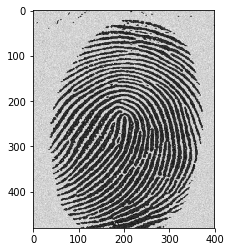

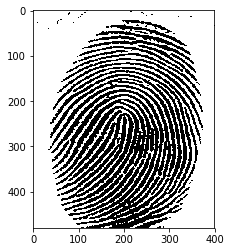

In [2]:
def threshold_img(img):
    T = filters.threshold_otsu(img)
    img[img<=T] = 0
    img[img>T] = 255
    return img

im = imread('../input_data/fingerprints.jpg')
plt.figure()
plt.imshow(im , cmap='gray')

im = threshold_img(im)
im = morphology.binary_closing(invert(im))
im = invert(im)

plt.figure()
plt.imshow(im , cmap='gray')

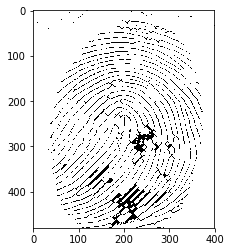

In [3]:
# s1_1 = []
s1_1 = [[0,0,0],
        [0,1,0],
        [1,1,1]]
s2_1 = [[0,0,0],
        [1,1,0],
        [0,1,0]]
s1_2 = [[1,1,1],
        [0,0,0],
        [0,0,0]]
s2_2 = [[1,1,1],
        [0,0,1],
        [0,0,0]]
s1_hit = np.array(s1_1)
s2_hit = np.array(s2_1)
s1_miss = np.array(s1_2)
s2_miss = np.array(s2_2)

def skeleton_pass(img,s1_hit,s1_miss,s2_hit,s2_miss):
    
    img = img^binary_hit_or_miss(img,s2_hit,s2_miss)^binary_hit_or_miss(img,rot90(s2_hit,1),rot90(s2_miss,1))
    img = img^binary_hit_or_miss(img,s1_hit,s1_miss)^binary_hit_or_miss(img,rot90(s1_hit,1),rot90(s1_miss,1))
    img = img^binary_hit_or_miss(img,rot90(s1_hit,2),rot90(s1_miss,2))^binary_hit_or_miss(img,rot90(s1_hit,3),rot90(s1_miss,3))
    img = img^binary_hit_or_miss(img,rot90(s2_hit,2),rot90(s2_miss,2))^binary_hit_or_miss(img,rot90(s2_hit,3),rot90(s2_miss,3))
    
    return img

def skeletonize(img):
    temp1 = img
    i=0
    while True:
        temp2 = skeleton_pass(temp1,s1_hit,s1_miss,s2_hit,s2_miss)
        if np.array_equal(temp1,temp2):
            break
        temp1 = np.copy(temp2)
        i+=1
    
    return temp1
    
im_inv = invert(im)
ot = skeletonize(im_inv)
ot = invert(ot)
plt.figure()
plt.imshow(ot, cmap='gray')

**Part 2**


The structuring element S1 detects pixels on the edge of the objects and S2 detects pixels along the diagonal edges and at the corners of object.

**Part 3**

Each pass only removes pixels at the boundary of an object. Hence, by using multiple passes, we progressively remove the boundary pixels until the object is only 1 pixel wide.

**Part 4**

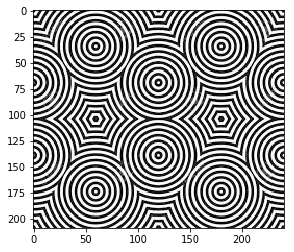

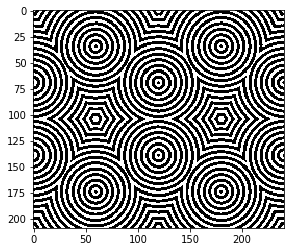

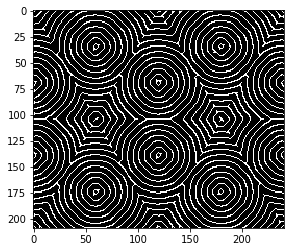

In [7]:
im = imread('../input_data/pattern1.jpeg')
plt.figure()
plt.imshow(im, cmap='gray')
im = threshold_img(img_as_ubyte(rgb2gray(im)))
im = invert(im).astype(bool)
plt.figure()
plt.imshow(im, cmap='gray')
plt.figure()
plt.imshow(skeletonize(im), cmap='gray')

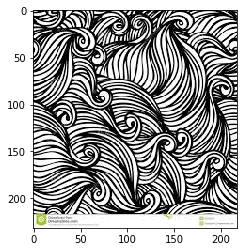

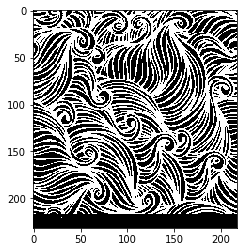

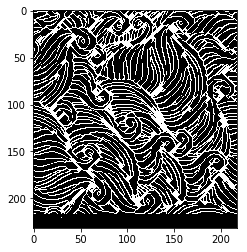

In [5]:
im = imread('../input_data/pattern2.jpeg')
plt.figure()
plt.imshow(im, cmap='gray')
im = threshold_img(img_as_ubyte(rgb2gray(im)))
im = invert(im).astype(bool)
plt.figure()
plt.imshow(im, cmap='gray')
plt.figure()
plt.imshow(skeletonize(im), cmap='gray')

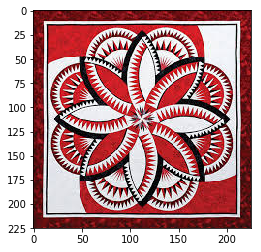

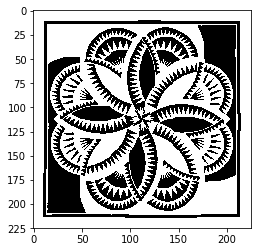

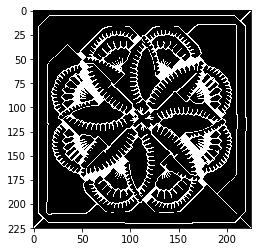

In [6]:
im = imread('../input_data/pattern3.jpeg')
plt.figure()
plt.imshow(im, cmap='gray')
im = threshold_img(img_as_ubyte(rgb2gray(im)))
im = invert(im).astype(bool)
plt.figure()
plt.imshow(im, cmap='gray')
plt.figure()
plt.imshow(skeletonize(im), cmap='gray')

# **Question 2**

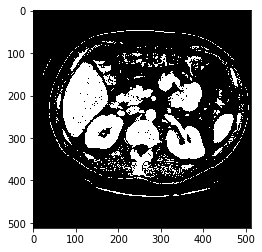

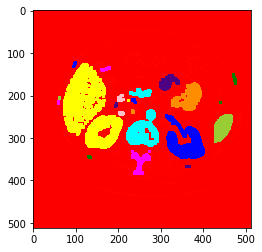

In [8]:
from skimage.morphology import closing, square
from skimage.filters import threshold_otsu

default_structure = np.ones((7,7))

def idx_check(index):
    if index < 0:
        return 0
    else:
        return index

def erosion(binary_img_matrix = None, structuring_element = default_structure):
    binary_img_matrix = np.asarray(binary_img_matrix)
    stru = np.asarray(structuring_element)
    ste_shp = stru.shape
    eroded_img = np.zeros((binary_img_matrix.shape[0], binary_img_matrix.shape[1]))
    ste_origin = (int(np.ceil((stru.shape[0] - 1) / 2.0)), int(np.ceil((stru.shape[1] - 1) / 2.0)))
    ste_origin=np.asarray(ste_origin)
    ste_origin=ste_origin.astype(int)
    for i in range(len(binary_img_matrix)):
        for j in range(len(binary_img_matrix[0])):
            
            overlap = binary_img_matrix[idx_check(i - ste_origin[0]):i + (ste_shp[0] - ste_origin[0]),idx_check(j - ste_origin[1]):j + (ste_shp[1] - ste_origin[1])]
            shp = overlap.shape
            ste_first_row_idx = int(np.fabs(i - ste_origin[0])) if i - ste_origin[0] < 0 else 0
            ste_first_col_idx = int(np.fabs(j - ste_origin[1])) if j - ste_origin[1] < 0 else 0

            ste_last_row_idx = ste_shp[0] - 1 - (i + (ste_shp[0] - ste_origin[0]) - binary_img_matrix.shape[0]) if i + (ste_shp[0] - ste_origin[0]) > binary_img_matrix.shape[0] else ste_shp[0]-1
            ste_last_col_idx = ste_shp[1] - 1 - (j + (ste_shp[1] - ste_origin[1]) - binary_img_matrix.shape[1]) if j + (ste_shp[1] - ste_origin[1]) > binary_img_matrix.shape[1] else ste_shp[1]-1

            if shp[0] != 0 and shp[1] != 0 and np.array_equal(np.logical_and(overlap, stru[ste_first_row_idx:ste_last_row_idx+1,ste_first_col_idx:ste_last_col_idx+1]),stru[ste_first_row_idx:ste_last_row_idx+1,ste_first_col_idx:ste_last_col_idx+1]):
                eroded_img[i, j] = 1
    return eroded_img

def dilation(binary_img_matrix = None, structuring_element = default_structure):
    binary_img_matrix = np.asarray(binary_img_matrix)
    stru = np.asarray(structuring_element)
    ste_shp = stru.shape
    dilated_img = np.zeros((binary_img_matrix.shape[0], binary_img_matrix.shape[1]))
    ste_origin = ((int(stru.shape[0]-1)/2), int((stru.shape[1]-1)/2))
    ste_origin=np.asarray(ste_origin)
    ste_origin=ste_origin.astype(int)
    for i in range(len(binary_img_matrix)):
        for j in range(len(binary_img_matrix[0])):
            #print(ste_origin[0])
            overlap = binary_img_matrix[idx_check(i - ste_origin[0]):i + (ste_shp[0] - ste_origin[0]), idx_check(j - ste_origin[1]):j + (ste_shp[1] - ste_origin[1])]
            shp = overlap.shape

            ste_first_row_idx = int(np.fabs(i - ste_origin[0])) if i - ste_origin[0] < 0 else 0
            ste_first_col_idx = int(np.fabs(j - ste_origin[1])) if j - ste_origin[1] < 0 else 0

            ste_last_row_idx = ste_shp[0] - 1 - (i + (ste_shp[0] - ste_origin[0]) - binary_img_matrix.shape[0]) if i + (ste_shp[0] - ste_origin[0]) > binary_img_matrix.shape[0] else ste_shp[0]-1
            ste_last_col_idx = ste_shp[1] - 1 - (j + (ste_shp[1] - ste_origin[1]) - binary_img_matrix.shape[1]) if j + (ste_shp[1] - ste_origin[1]) > binary_img_matrix.shape[1] else ste_shp[1]-1

            if shp[0] != 0 and shp[1] != 0 and np.logical_and(stru[ste_first_row_idx:ste_last_row_idx+1, ste_first_col_idx:ste_last_col_idx+1], overlap).any():
                dilated_img[i, j] = 1
    return dilated_img


im = cv.imread('../input_data/kidney.jpg',0)
_,im = cv.threshold(im,130,1,cv.THRESH_BINARY)

plt.imshow(im,cmap='gray')
plt.show()

res= cv.morphologyEx(im, cv.MORPH_OPEN, default_structure)
res=label(res)
res = label2rgb(res,image=im)
res=255*((res-res.min())/(res.max()-res.min()))
res=res.astype('uint8')

plt.imshow(res)
plt.show()

# **Question 3**

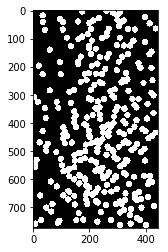

In [10]:
coins = imread('../input_data/coins.jpg',0)

[x, y] = coins.shape
coins1=coins

plt.imshow(coins,cmap='gray')
plt.show()

for i in range(x):
    for j in range(y):
        if(i>=10 and i<x-10) and (j>=10 and j<y-10):
            coins1[i][j]=0

coins = util.img_as_bool(coins)
res = morphology.binary_erosion(coins, selem=morphology.disk(1))
edges = coins ^ res
hough_res = transform.hough_circle(edges, [10, 11, 12])
accums, cx, cy, radii = transform.hough_circle_peaks(hough_res, [10, 11, 12],total_num_peaks=600)

**Part 1 Coins touching the boundary**

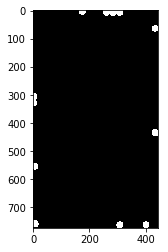

In [11]:
image = np.zeros((x + 48, y + 48, 3), dtype=np.uint8)
for center_y, center_x, radius in zip(cy, cx, radii):
    if (center_x - radius) <= 1 or (center_x + radius) >= (y-1) or (center_y - radius) <= 1 or (center_y + radius) >= (x-1):
        circy, circx = draw.circle(center_y + 24, center_x + 24, radius)
        image[circy, circx] = (255, 255, 255)
    
plt.imshow(image[24:-24, 24:-24, :], cmap="gray")
plt.show()

In [12]:
class Node(object):
    
    def __init__(self, value):
        self.value = value
        self.parent = self 
        self.rank = 0


    def __str__(self):
        st = "[value: " + str(self.value) + ", parent: " + str(self.parent.value) 
        st += ", rank: " + str(self.rank) +  "]"
        return st

    

class UnionFind:

    def __init__(self):
        self.__nodes_addressed_by_value = {}


    def MakeSet(self, value):

        if self.GetNode(value):
            return self.GetNode(value)


        node = Node(value)

        self.__nodes_addressed_by_value[value] = node

        return node


    def Find(self, x):



        if x.parent  != x:
            x.parent = self.Find(x.parent) 
            
        return x.parent


    def Union(self, x, y):

        x_root = self.Find(x)
        y_root = self.Find(y)
        
        if x == y or x_root == y_root:
            return

        if x_root.rank < y_root.rank:
            x_root.parent = y_root

        elif x_root.rank > y_root.rank:
            y_root.parent = x_root

        else:
            x_root.parent = y_root
            y_root.rank = y_root.rank + 1



    def GetNode(self, value): 
        if value in self.__nodes_addressed_by_value:
            return self.__nodes_addressed_by_value[value]
        else:
            return False





def Connected_Components_Labelling(bool_input_image):

    image_width = len(bool_input_image[0])
    image_height = len(bool_input_image)

    labelled_image = np.zeros((image_height, image_width), dtype=np.int16)
    uf = UnionFind() 
    current_label = 1


    for y, row in enumerate(bool_input_image):
        for x, pixel in enumerate(row):

            if pixel == False:
                pass
            else: 
                labels = neighbouring_labels(labelled_image, x, y)

                if not labels:
                    labelled_image[y,x] = current_label
                    uf.MakeSet(current_label)
                    current_label = current_label + 1

                else:
                    smallest_label = min(labels)
                    labelled_image[y,x] = smallest_label

                    if len(labels) > 1: 
                        for label in labels:
                            uf.Union(uf.GetNode(smallest_label), uf.GetNode(label))


    final_labels = {}
    new_label_number = 1

    for y, row in enumerate(labelled_image):
        for x, pixel_value in enumerate(row):

            if pixel_value > 0:
                new_label = uf.Find(uf.GetNode(pixel_value)).value 
                labelled_image[y,x] = new_label

                if new_label not in final_labels:
                    final_labels[new_label] = new_label_number
                    new_label_number = new_label_number + 1


    for y, row in enumerate(labelled_image):
        for x, pixel_value in enumerate(row):
            if pixel_value > 0:
                labelled_image[y,x] = final_labels[pixel_value]

    return labelled_image



def neighbouring_labels(image, x, y):

        labels = set()


        if x > 0:
            west_neighbour = image[y,x-1]
            if west_neighbour > 0:
                labels.add(west_neighbour)


        if y > 0: 
            north_neighbour = image[y-1,x]
            if north_neighbour > 0: 
                labels.add(north_neighbour)


        if x > 0 and y > 0: 
            northwest_neighbour = image[y-1,x-1]
            if northwest_neighbour > 0:
                labels.add(northwest_neighbour)
        
        if y > 0 and x < len(image[y]) - 1:
            northeast_neighbour = image[y-1,x+1]
            if northeast_neighbour > 0:
                labels.add(northeast_neighbour)
    
        return labels

**Part 2 Overlapping Coins**

[]

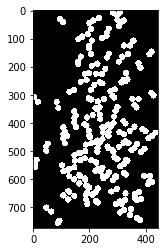

In [14]:
coins=cv.imread('../input_data/coins.jpg',0)
_,coins=cv.threshold(coins,130,1,cv.THRESH_BINARY)

opp=Connected_Components_Labelling(coins)

[a, b] = opp.shape
mx=opp.max()
op=opp
count=np.zeros(mx+1,dtype=int)
for i in range(a):
    for j in range(b):
        count[op[i][j]]=count[op[i][j]]+1

for i in range(count.shape[0]):
    if(count[i]>400):
        count[i]=1
    else:
        count[i]=0
        
count[0]=0
for i in range(a):
    for j in range(b):
        op[i][j]=count[op[i][j]]

plt.imshow(op,cmap='gray')
plt.plot()

**Part 3 Non-overlapping coins**

[]

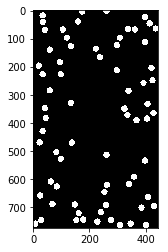

In [15]:
opp=Connected_Components_Labelling(coins)

mx=opp.max()
op=opp
[a, b] = op.shape
count=np.zeros(mx+1,dtype=int)
for i in range(a):
    for j in range(b):
        count[op[i][j]]=count[op[i][j]]+1

for i in range(count.shape[0]):
    if(count[i]<400):
        count[i]=1
    else:
        count[i]=0
        
count[0]=0
for i in range(a):
    for j in range(b):
        op[i][j]=count[op[i][j]]

plt.imshow(op,cmap='gray')
plt.plot()

# **Question 4**

**Part 1 Objects with one or more holes**

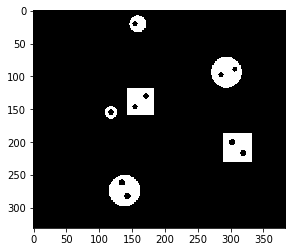

In [16]:
objects=cv.imread('../input_data/objects.png',0)
_,objects=cv.threshold(objects,130,1,cv.THRESH_BINARY)

[x,y] = objects.shape
obj = Connected_Components_Labelling(objects)
objects1 = np.zeros((x,y))
for i in range(x):
    for j in range(y):
        if(objects[i][j]==1):
            objects1[i][j]=0
        else:
            objects1[i][j]=1

obj1=Connected_Components_Labelling(objects1)
for i in range(x):
    for j in range(y):
        if(obj1[i][j]>1):
            obj1[i][j]=1
        else:
            obj1[i][j]=0

res_all=objects+obj1

all_filled_c=Connected_Components_Labelling(res_all)


cnt_all=np.zeros(all_filled_c.max()+1,dtype=int)
cnt_holes=np.zeros(all_filled_c.max()+1,dtype=int)

for i in range(all_filled_c.shape[0]):
    for j in range(all_filled_c.shape[1]):
        cnt_all[all_filled_c[i][j]]=cnt_all[all_filled_c[i][j]]+1
        
for i in range(all_filled_c.shape[0]):
    for j in range(all_filled_c.shape[1]):
        cnt_holes[obj[i][j]]=cnt_holes[obj[i][j]]+1

output_holes=np.zeros(obj.shape)        
for i in range(all_filled_c.shape[0]):
    for j in range(all_filled_c.shape[1]):
        if(cnt_holes[obj[i][j]]==cnt_all[all_filled_c[i][j]]):
            output_holes[i][j]=1
        else:
            output_holes[i][j]=0
            
output_holes=objects - output_holes
plt.imshow(output_holes,cmap='gray')
plt.show()

**Part 2 All square objects in image**

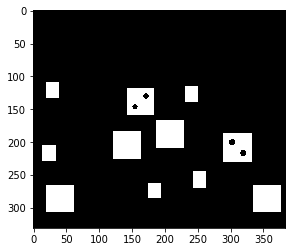

In [17]:
def hits(img,s):
    a,b=img.shape
    output=np.ones((a,b),dtype='uint8')
    for i in range(1,a-1):
        for j in range(1,b-1):
            flag=1
            for p in range(0,3):
                for q in range(0,3):
                    if(s[p][q]!=img[i+p-1][j+q-1]):
                        flag=0
            if(flag==1):
                output[i][j]=1
            else:
                output[i][j]=0
    return output

str_el=np.asarray([[0,0,0],[0,1,1],[0,1,1]])

op=hits(objects,str_el)


label_sq=Connected_Components_Labelling(objects)

rem_labels=np.zeros(label_sq.max()+1,dtype=int)
label_sq_2=label_sq*(op)


for i in range(label_sq_2.shape[0]):
    for j in range(label_sq_2.shape[1]):
        if(label_sq_2[i][j]!=0):
            rem_labels[label_sq_2[i][j]]=1
        
for i in range(label_sq.shape[0]):
    for j in range(label_sq.shape[1]):
        if(rem_labels[label_sq[i][j]]!=0):
            label_sq[i][j]=1
        else:
            label_sq[i][j]=0

circ = objects - label_sq
            
plt.imshow(label_sq,cmap='gray')
plt.show()


**Part 3 Square objects with holes**

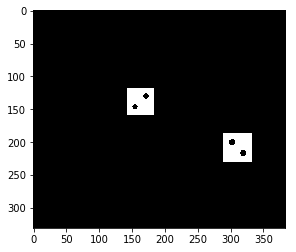

In [18]:
objects=label_sq

obj=Connected_Components_Labelling(objects)
objects1=np.zeros(objects.shape)

for i in range(objects.shape[0]):
    for j in range(objects.shape[1]):
        if(objects[i][j]==1):
            objects1[i][j]=0
        else:
            objects1[i][j]=1

obj1=Connected_Components_Labelling(objects1)

for i in range(objects.shape[0]):
    for j in range(objects.shape[1]):
        if(obj1[i][j]>1):
            obj1[i][j]=1
        else:
            obj1[i][j]=0

res_all=objects+obj1

all_filled_c=Connected_Components_Labelling(res_all)


cnt_all=np.zeros(all_filled_c.max()+1,dtype=int)
cnt_holes=np.zeros(all_filled_c.max()+1,dtype=int)

for i in range(all_filled_c.shape[0]):
    for j in range(all_filled_c.shape[1]):
        cnt_all[all_filled_c[i][j]]=cnt_all[all_filled_c[i][j]]+1
        
for i in range(all_filled_c.shape[0]):
    for j in range(all_filled_c.shape[1]):
        cnt_holes[obj[i][j]]=cnt_holes[obj[i][j]]+1

output_holes=np.zeros(obj.shape)        
for i in range(all_filled_c.shape[0]):
    for j in range(all_filled_c.shape[1]):
        if(cnt_holes[obj[i][j]]==cnt_all[all_filled_c[i][j]]):
            output_holes[i][j]=1
        else:
            output_holes[i][j]=0
            
output_holes=objects - output_holes
plt.imshow(output_holes,cmap='gray')
plt.show()

**Part 4 Circular objects with holes**

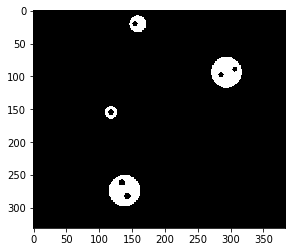

In [19]:
objects=cv.imread('../input_data/objects.png',0)

objects = circ
[x,y] = objects.shape
obj=Connected_Components_Labelling(objects)
objects1=np.zeros((x,y))

for i in range(x):
    for j in range(y):
        if(objects[i][j]==1):
            objects1[i][j]=0
        else:
            objects1[i][j]=1

obj1=Connected_Components_Labelling(objects1)

for i in range(x):
    for j in range(y):
        if(obj1[i][j]>1):
            obj1[i][j]=1
        else:
            obj1[i][j]=0

res_all=objects+obj1

all_filled_c=Connected_Components_Labelling(res_all)


cnt_all=np.zeros(all_filled_c.max()+1,dtype=int)
cnt_holes=np.zeros(all_filled_c.max()+1,dtype=int)

for i in range(all_filled_c.shape[0]):
    for j in range(all_filled_c.shape[1]):
        cnt_all[all_filled_c[i][j]]=cnt_all[all_filled_c[i][j]]+1
        
for i in range(all_filled_c.shape[0]):
    for j in range(all_filled_c.shape[1]):
        cnt_holes[obj[i][j]]=cnt_holes[obj[i][j]]+1

output_holes=np.zeros(obj.shape)        
for i in range(all_filled_c.shape[0]):
    for j in range(all_filled_c.shape[1]):
        if(cnt_holes[obj[i][j]]==cnt_all[all_filled_c[i][j]]):
            output_holes[i][j]=1
        else:
            output_holes[i][j]=0
            
output_holes=objects - output_holes
plt.imshow(output_holes,cmap='gray')
plt.show()

# **Question 5**

**Part 1**

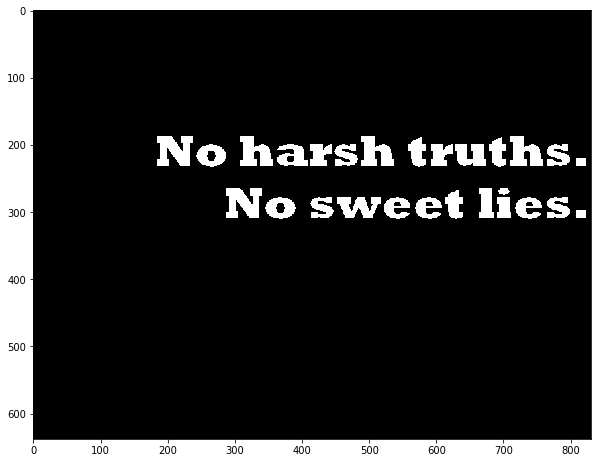

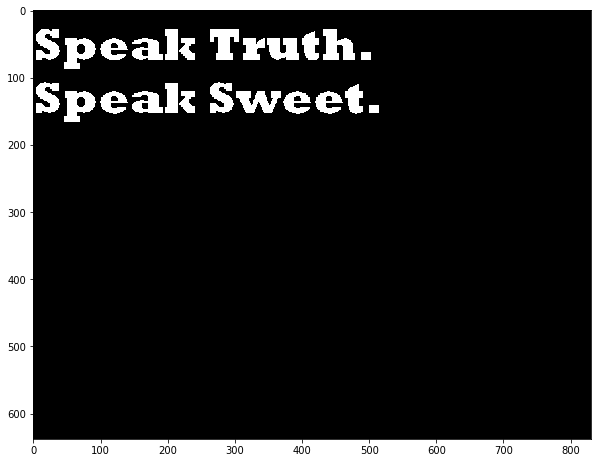

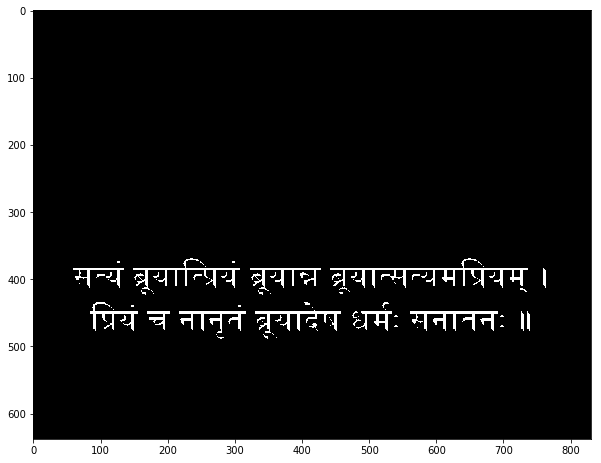

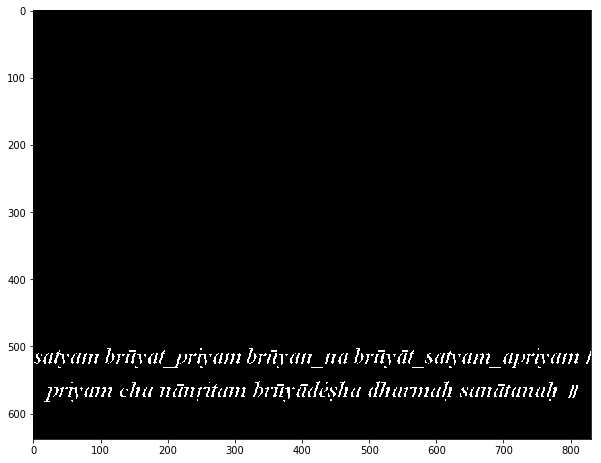

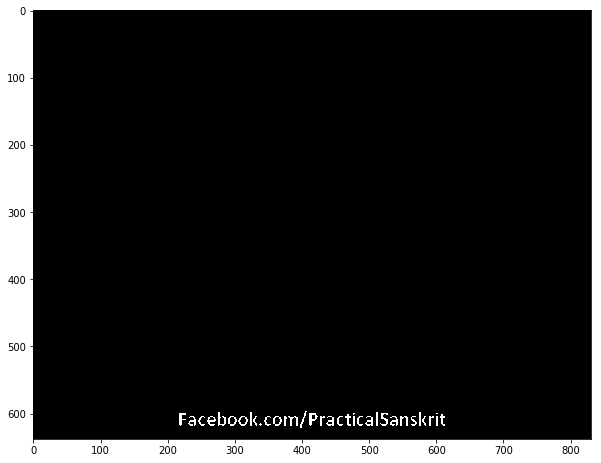

In [20]:
def getColor(img):
        [x, y, z] = img.shape
        cnt = np.zeros((256,256,256))
        for i in range(x):
            for j in range(y):
                cnt[img[i][j][0]][img[i][j][1]][img[i][j][2]]+=1
            
        color = np.zeros((6,3))
        
        for t in range(6):
            m = 0
            a=0
            b=0
            c=0
            for i in range(256):
                for j in range(256):
                    for k in range(256):
                        if m < cnt[i][j][k] :
                            m = cnt[i][j][k]
                            a=i
                            b=j
                            c=k
            
            color[t][0] = a
            color[t][1] = b
            color[t][2] = c
            cnt[a][b][c] = 0
        
        return color

def getMask(img,color):
    [x, y, z] = img.shape
    mask = np.zeros((x,y))
    imgMask = np.ones((x,y,3))*255
    
    for i in range(x):
        for j in range(y):
            if img[i][j][0]==color[0] and img[i][j][1]==color[1] and img[i][j][2]==color[2]:
                mask[i][j] = 1
                imgMask[i][j] = img[i][j]
    
    return imgMask, mask
    


img=imread('../input_data/languages.png')
[x,y,z]=img.shape
img=img[20:x-20,20:y-20]
color=getColor(img)

[a,b,c]=img.shape
masks=np.zeros((5,a,b))

for i in range(1,6):
    imgMask,masks[i-1]=getMask(img,color[i])
    imgMask=imgMask.astype('uint8')
    plt.figure(figsize=(10,10))
    plt.imshow(masks[i-1],cmap='gray')
    plt.show()